In [41]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [33]:
url = "https://raw.githubusercontent.com/stevengarcia2132/WebScrape-Amazon/main/self-help%20books.csv"

In [34]:
df = pd.read_csv(url)
df = df.rename(columns={'rating_value': 'rating','review': 'number of reviews'})

In [35]:
df['number of reviews'] = df['number of reviews'].str.replace(',', '')
df['number of reviews'] = pd.to_numeric(df['number of reviews'])

df.head()

,title,number of reviews,price,rating,link
0,The Greatness Mindset: Unlock the Power of You...,84,16,4.9,./index_files/71G2ktlRotL._AC_UY218_.jpg
1,The Subtle Art of Not Giving a F*ck: A Counter...,102446,0,4.6,./index_files/81A5jQHA+lL._AC_UY218_.jpg
2,Can't Hurt Me: Master Your Mind and Defy the Odds,70998,0,4.8,./index_files/81gByv+FhjL._AC_UY218_.jpg
3,The Mountain Is You: Transforming Self-Sabotag...,11777,22,4.8,./index_files/71AHFDEpkdL._AC_UY218_.jpg
4,Think and Grow Rich: 1937 Edition,88390,0,4.7,./index_files/810+SBbizeL._AC_UY218_.jpg


In [36]:
#create new  column on if the book has a price
df['cost'] = df['price'].apply(lambda x: 'Not Free' if x > 0 else 'Free')

df

,title,number of reviews,price,rating,link,cost
0,The Greatness Mindset: Unlock the Power of You...,84,16,4.9,./index_files/71G2ktlRotL._AC_UY218_.jpg,Not Free
1,The Subtle Art of Not Giving a F*ck: A Counter...,102446,0,4.6,./index_files/81A5jQHA+lL._AC_UY218_.jpg,Free
2,Can't Hurt Me: Master Your Mind and Defy the Odds,70998,0,4.8,./index_files/81gByv+FhjL._AC_UY218_.jpg,Free
3,The Mountain Is You: Transforming Self-Sabotag...,11777,22,4.8,./index_files/71AHFDEpkdL._AC_UY218_.jpg,Not Free
4,Think and Grow Rich: 1937 Edition,88390,0,4.7,./index_files/810+SBbizeL._AC_UY218_.jpg,Free
...,...,...,...,...,...,...
203,The Artist's Way Starter Kit,1960,30,4.8,./index_files/81gVBP23vBL._AC_UY218_.jpg,Not Free
204,Change Starts with You: Following Your Fire to...,4,0,4.7,./index_files/81em9kpgL1L._AC_UY218_.jpg,Free
205,"CSB Study Bible For Women, Teal Flowers Leathe...",1202,53,4.9,./index_files/81xgjNa6EbL._AC_UY218_.jpg,Not Free
206,The Home Edit Life: The No-Guilt Guide to Owni...,13070,14,4.8,./index_files/81I2HYzFPSL._AC_UY218_.jpg,Not Free


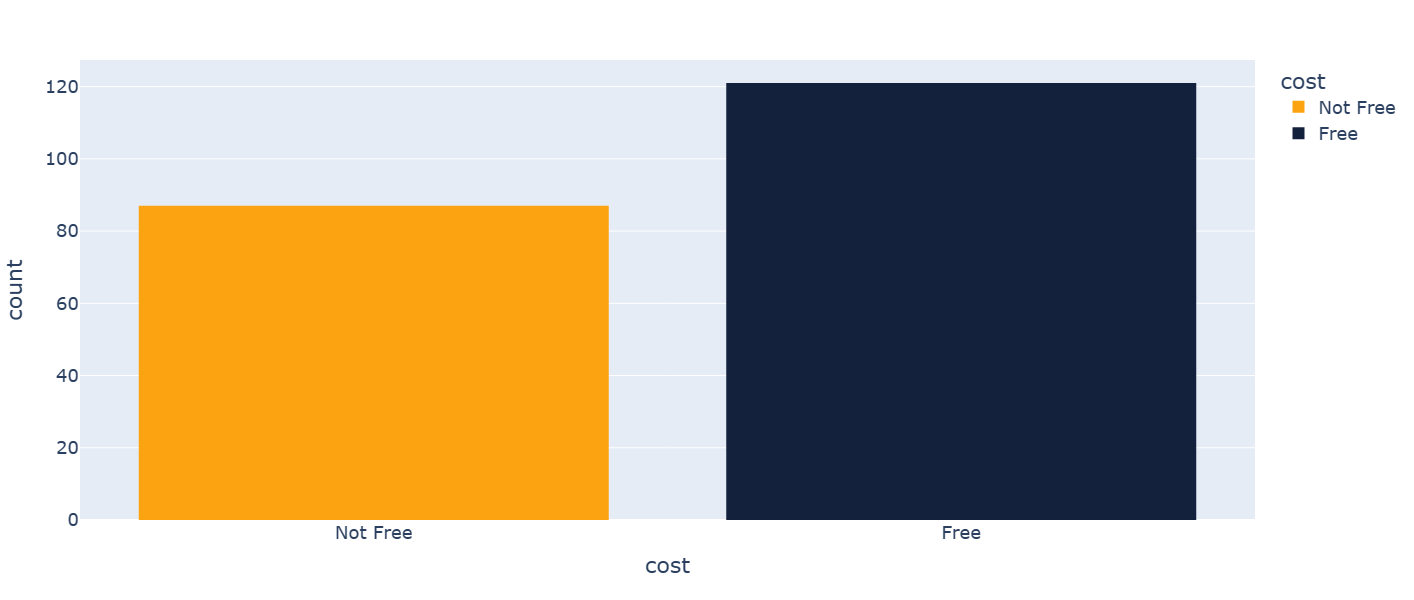

In [56]:
#how books are free compared to not free
fig = px.histogram(df, x='cost', color= 'cost', color_discrete_sequence=['rgb(252,163,17)', 'rgb(20,33,61)'])
#fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
 
    font=dict(size=18),
    width=800,  # set the width to 800 pixels
    height=600  # set the height to 600 pixels
)

fig.write_image('costfree.png')

fig.show()


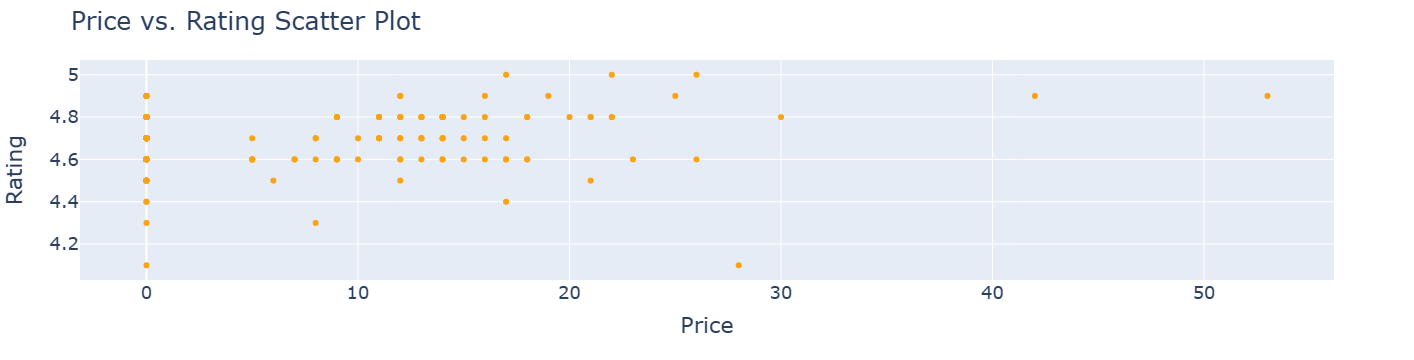

In [98]:
fig = px.scatter(df, x='price', y='rating', hover_data=['title', 'number of reviews'],color_discrete_sequence=['rgb(252,163,17)', 'rgb(20,33,61)'])

# Update layout
fig.update_layout(
    title='Price vs. Rating Scatter Plot',
    xaxis_title='Price',
    yaxis_title='Rating',
     font=dict(size=18),

)

# Show figure
fig.show()
fig.write_image('Price vs Rating Scatter.png')


In [58]:
#correlation matrix
corr_matrix = df[['price','rating','number of reviews']].corr()
corr_matrix
#plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')

,price,rating,number of reviews
price,1.000000,0.174920,-0.210228
rating,0.174920,1.000000,-0.017235
number of reviews,-0.210228,-0.017235,1.000000


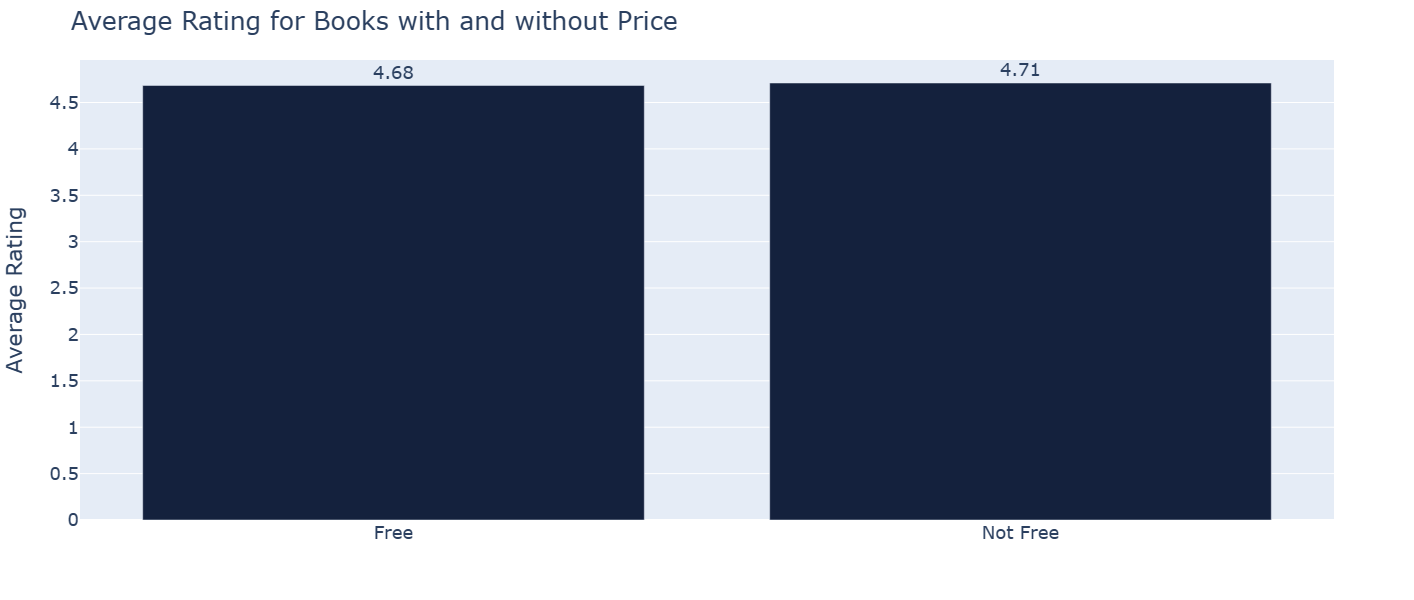

In [76]:
#rating for free and not free books
avg_rating = df.groupby('cost')['rating'].mean().reset_index()


fig = px.bar(avg_rating,
             x='cost',
             y='rating',
             text= 'rating', 
             labels={'cost': 'Has Price', 'rating': 'Average Rating'},
             color_discrete_sequence=['rgb(20,33,61)','rgb(252,163,17)'])



fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    title='Average Rating for Books with and without Price',
    xaxis_title='',
    yaxis_title='Average Rating',
    font=dict(size=18),
    width=800,  # set the width to 800 pixels
    height=600  # set the height to 600 pixels
)
fig.show()

fig.write_image('Average rating for books.png')


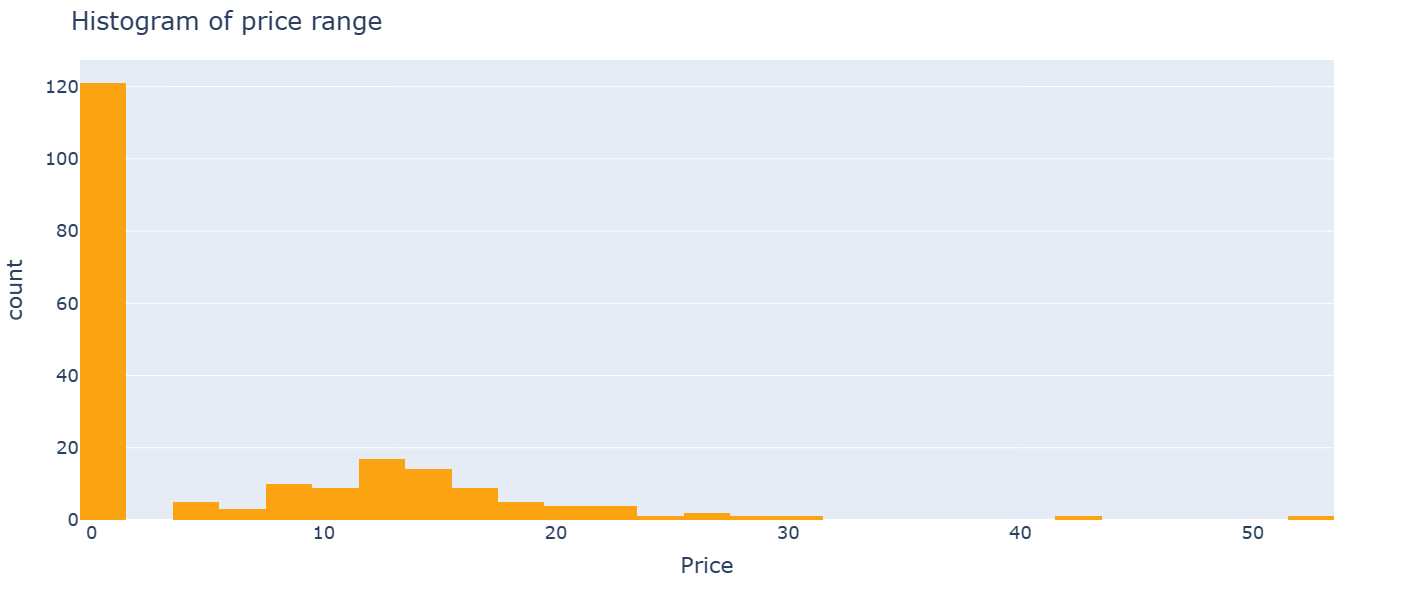

In [85]:
#hist of price range
fig = px.histogram(df, x='price', nbins=40,  color_discrete_sequence= ['rgb(252,163,17)'])
fig.update_layout(
    title='Histogram of price range',
    xaxis_title='Price',
    font=dict(size=18),
    width=800,  # set the width to 800 pixels
    height=600  # set the height to 600 pixels
)
fig.write_image('Hist of price.png')
fig.show()

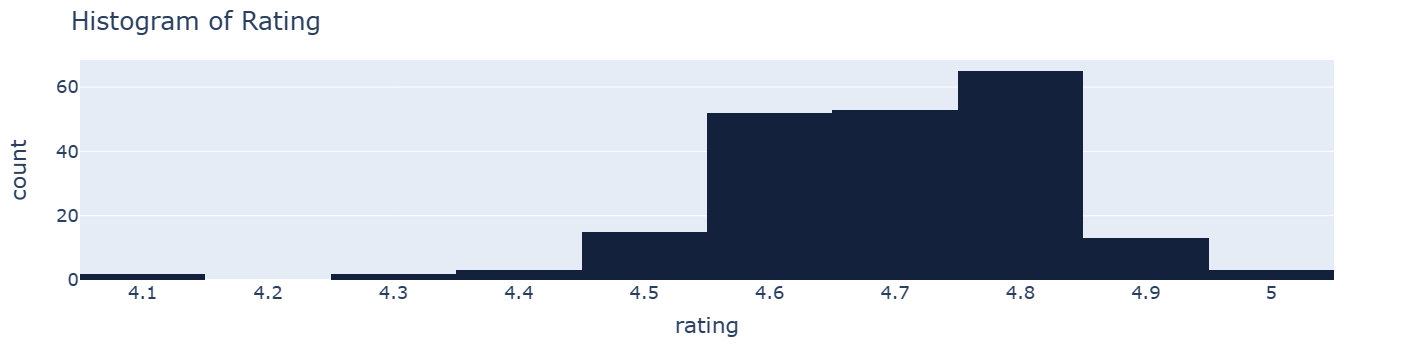

In [99]:
#distribution of ratings
fig = px.histogram(df, x='rating',color_discrete_sequence=  ['rgb(20,33,61)', 'rgb(252,163,17)'],nbins=10)

fig.update_layout(
    title='Histogram of Rating',
    xaxis_title='rating',
    font=dict(size=18),
)
fig.show()
fig.write_image('Hist of rating.png')
